<a href="https://colab.research.google.com/github/KaioViana/Estudos/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Desafio Kaggle Titanic**
---
Desafio do titanic abrange de maneira clara quais técnicas de DataScience aplicar para prever a taxa de sobrevivência no acidente.
#####É o problema clássico, prever o resultado de um evento binário. Em termos leigos, isso significa que ocorreu ou não. Um aplicativo de negócios comum é a rotatividade ou retenção de clientes. Outro caso de uso popular é a taxa de mortalidade ou análise de sobrevivência da assistência médica.
#####No escopo desse desafio não está os processos comuns em um processo de ciência de dados, como arquitetura, governança e extração de dados. Apenas a limpeza está no escopo.

#**"DataScience Framework"**
---
>1 - Defina o problema:
>>* Se ciência de dados, big data, aprendizado de máquina, análise preditiva, inteligência de negócios ou qualquer outra palavra da moda é a solução, então qual é o problema ? Como diz o ditado, não coloque a carroça na frente do cavalo. **Problemas** antes dos **requisitos**, **requisitos** antes das **soluções**, **solução** antes do **design** e **desing** antes da **tecnologia**.
>
>2 - Reúna os dados:
>>* Jhon Naisbitt escreveu em seu livro Megatrends de 1984: "estamos nos afogando em dados, mas buscando conhecimento." Então, é provável que os conjuntos de dados já existam em algum lugar, em algum formato. Pode ser externo ou interno, estruturado ou não, estático ou transmitido, objetivo ou subjetivo, etc. Você não precisa reinventar a roda, apenas precisa saber onde encontrá-la. nos preocuparemos em transform dados sujos em dados limpos.
>
>3 - Preparar os dados para consumo:
>>* Essa etapa é geralmente chamada de organização de dados, um processo necessário para transformar dados "selvagens" em dados "gerenciáveis". A organização de dados inclui a implementação de arquiteturas de dados para o armazenamento e processamento, desenvolvimento de padrões de governança de dados para qualidade e controle, extração de dados (ou seja, ETL e raspagem da Web) e para identificar pontos de dados aberrantes, ausentes ou fora de linha.
>
>4 - Realizar análise exploratória:
>> * Qualquer pessoa que já trabalhou com dados sabe, GIGO(Garbage, In, Out). Portanto, é importante implantar estatísticas descritivas e gráficas para procurar possíveis problemas, padrões, classificações, correlações, correlações no conjunto de dados. Além disso, a categorização de dados (ou seja, qualitativa versus quantitativa) também é importante para entender e selecionar o teste de hipótese ou o modelo de dados corretos.
>
>5 - Modelo:
>> * Como as estatísticas descritivas e inferenciais, a modelagem de dados pode resumir os dados ou prever resultados futuros. O conjunto de dados e os resultados esperados determinarão os algortimos disponíveis para uso. É importante lembrar que algoritmos são ferramentas e não varinhas mágicas ou balas de prata. Você ainda deve ser o mestre de artesanato que sabe como selecionar a ferramenta certa para o trabalho. Uma analogia seria pedir que alguém lhe entregasse uma chave de fenda Philip, e eles entregassem um chave de de fenda de ponta chata ou, pior ainda, um martelo. Na melhor das hipóteses, mostra uma completa falta de entendimento. Na pior, impossibilita a conclusão do projeto. O mesmo acontece na modelagem de dados. O modelo errado pode levar a um desenpenho ruim na melhor das hipóteses e a uma conclusão errada (que é usada como inteligência acionável) na pior das hipóteses, e pior ainda, **perca de quem sabe, milhares de reais para uma empresa**.
>
>6 - Validar e implementar o modelo de dados:
>> * Depois de treinar seu modelo de dados com base em um subconjunto de dados, é hora de testá-lo. Isso ajuda a garantir que você não tenha ajustado demais o modelo ou o tenha tornado tão específico para o subconjunto selecionado, que ele não se ajusta com precisão a outro conjunto de dados. Nesta etapa, determinamos se o nosse  modelo sperajustou, generalizou ou subestimou nosso conjunto de dados.
>
>7 - Otimize e crie estratégias: 
>>Este é o passo do "homem biônico", no qual você repete o processo para torná-lo melhor ...mais forte... mais rápido do que era antes. Como cientista de dados, sua estratégia deve tercerizar as operações do desenvolvedor e o encadeamento de aplicativos, para que você tenha mais tempo para se concentrar nas recomendações e no desing. Quando você conseguir empacotar suas idéias, isso se tornará sua taxa de "câmbio de moeda."
>

#**Initial imports**
---

In [0]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
from IPython import display
import sklearn
import random
import time

import warnings
warnings.filterwarnings('ignore')

from subprocess import check_output

pd.set_option('display.max_rows', None)

#**Load Data Modelling Libraries**
---

In [0]:
# Modelos comuns de algorítmos
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process, model_selection
from xgboost import XGBClassifier

# Modelos comuns para manipulação dos dados
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import metrics

# Visualizações
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

# Configurar parâmetros de visualização dos dados
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

#**Conhecendo os dados**
---
Nesta etapa é o momento em que vamos realmente conhecer nossos dados. Ver seus tipo e valores e etc. Uma análise inicial.
>1. A coluna Survived é a nossa variável dependente. É uma tipo de dados nominal binário de 1 para sobreviveu e 0 para morto. Todas as outras colunas são preditores ou variáveis independentes. É importante notar que mais variáveis preditores não formam um modelo melhor, mas as variáveis corretas.
>
>2. As variáveis PassengerID e Ticket são consideradas identificadores únicos aleatórios, que não têm impacto na variável de resultado. Assim, eles serão excluídos da análise.
>
>3. A variável Pclass é um tipo de dados ordinal para a classe de ticket, um proxy para o status socioeconômico, representando :
>>1 = classe alta;
>>
>>2 = classe média;
>>
>> 3 = classe baixa;
>>
>
>4. A variável Name é um tipo de dados nominal. Pode ser usado na engenharia de recursos para derivar o gênero do título, o tamanho da família através do sobrenome e o status de títulos como Dr. e etc. Faremos o uso delas para ver se faz diferença ser Dr. ou não.
>
>5. As variáveis Sex e Embarked são um tipo de dados nominal. Eles serão convertidos em variáveis dummy para cálculos matemáticos.
>
>6. A variável Age e Fare são tipos de dados quantitativos contínuos.
>
>7. O SibSp representa o número de irmãos/cônjugues relacionados a bordo e Parch representa o número de paos/filhos relacionados a bordo. Ambos são do tipo de dados quantitativos discretos. Isso pode ser usado para a engenharia de recursos para criar uma variável tamanho da família do tipo quantitativa discreta.
>
>8. A variável Cabin é um tipo de dados nominal que pode ser usado na engenharia de recursos para posição aproximada no navio qundo o incidente ocorre e o status social /econômico nos níveis do convés. No entanto, como existem muitos valores nulos, ele não agrega valor e, portato, é excluído da análise.

In [4]:
# importando os arquivos
from google.colab import files
up = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [5]:
# lendo os arquivos
data_raw = pd.read_csv('train.csv')
data_val = pd.read_csv('test.csv')

# criando cópia dos dados de treino para podermos brincarmos com ele hehe
data1 = data_raw.copy(deep=True)
data_cleaner = [data1, data_val] # fazendo atribuições para podermos executar limpezas e etc

# pré-visualizando
data_raw.info()
print('\n\n')
data_raw.sample(15)

# Tipo das variáveis:
#     Name: categórica nominal
#     Sex: categórica nominal
#     Pclass: categórica ordinal
#     Age: numérica contínua
#     SibSp: numérica discreta
#     Parch: numérica discreta
#     Ticket: numérica discreta
#     Fare: numérica contínua
#     Cabin: @
#     Embarked: categórica nominal

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB





,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.50,0,2,230080,26.0000,F2,S
122,123,0,2,"Nasser, Mr. Nicholas",male,32.50,1,0,237736,30.0708,NaN,C
654,655,0,3,"Hegarty, Miss. Hanora ""Nora""",female,18.00,0,0,365226,6.7500,NaN,Q
586,587,0,2,"Jarvis, Mr. John Denzil",male,47.00,0,0,237565,15.0000,NaN,S
695,696,0,2,"Chapman, Mr. Charles Henry",male,52.00,0,0,248731,13.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
238,239,0,2,"Pengelly, Mr. Frederick William",male,19.00,0,0,28665,10.5000,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.00,0,0,PC 17477,69.3000,B35,C
116,117,0,3,"Connors, Mr. Patrick",male,70.50,0,0,370369,7.7500,NaN,Q


#**Os 4 C's da limpeza de dados:**
---
Corrigindo, completando, criando e convertendo.
######Nesta etapa, limparemos nossos dados:
>1 - corrigindo valores e valores discrepantes
>>*  Revendo os dados, não parece haver nenhuma entrada de dados aberrante ou não aceitável. Além disso, vemos que podemos ter discrepâncias potenciais em termo de idade e tarifa. No entanto, como são valores razoáveis, esperaremos até concluir nossa análise exploratória para determinar se devemos incluir ou excluir do conjunto de dados. Deve-se observar que, se fossem valores ilógicos, por exemplo, idade = 800 em vez de 80, provavelmente será uma decisão segura de corrigir agora. No entanto queremos ter cuidado ao modificar os dados.
>
>2 - preenchendo informações ausentes;
>>* Existem valores nulos ou dados ausentes nos campos Age, Cabin e Embarked. Valores ausentes podem ser ruins, porque alguns algoritmos não sabem como lidar com valores nulos e falharão. Enquanto outros, como árvores de decisão, podem lidar com valores nulos. Portanto, é importante corrigir antes de começarmos a modelar, porque compararemos e contrastaremos vários modelos. Existem dois métodos comuns, excluir ou prencher com um valor razoável (média/moda/desvio padrão/mediana).
>
>3 - criando novos recursos para análise ;
>>* A engenharia de recursos é quando usamos os recursos existentes para criar novos recursos para determinar se eles fornecem novos sinais para prever nosso resultado. Para este conjunto de dados, criaremos um recurso de título para determinar se ele desempenhou algum papel na sobrevivência.
>
>4 - convertendo campos para o forato correto para cálculos e apresentação;
>>* Por último, mas não menos importante, trataremos da formatação. Não há formatos de data ou moeda, mas formatos de tipo de dados. Nossos dados categóricos são importados como objetos, o que dificulta os cálculos matemáticos. Para esse conjunto de dados, converteremos tipos de dados de objeto em variáveis dummy categóticas.
>

In [6]:
print('Colunas do data1 com valores null:\n', data1.isnull().sum())
print('-'*10)
print('Colunas do data_val com valores null:\n', data_val.isnull().sum())
print('-'*10)
data1.describe(include='all')


# Oque limpar dos dados ?
# data1:
#   Contém valores faltantes nas colunas Age, Cabin e Embarked
# data_val:
#   Contém valores faltantes nas colunas Age, Cabin e Fare

Colunas do data1 com valores null:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Colunas do data_val com valores null:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Chapman, Mr. John Henry",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


#**Limpando/Completando os dados**

In [7]:
# COMPLETANDO: completar ou deletar valores faltantes nos dados de treino/test
for dataset in data_cleaner:
  # completar idades faltantes com a mediana
  dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
  # completar enbarked com a moda
  dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)
  # completar Tarifa faltantes com a mediana
  dataset['Fare'].fillna(dataset['Fare'].median(), inplace=True)

# deletando coluna Cabin e outras que não será necessária para nossa análise
drop_column = ['PassengerId', 'Cabin', 'Ticket']
data1.drop(drop_column, axis=1, inplace=True)

print(data1.isnull().sum())
print('-'*10)
print(data_val.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [0]:
# CRIANDO: criando novos recursos para os dados de treino e test (Engenharia de recursos)
for dataset in data_cleaner:
  # variáveis discretas  
  dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1 # soma a quantidade de parentes e cônjugues mais o passageiro
  # criando a variávels IsAlone para verificar se a pessoa estava só a bordo do návio ou não e inicializando com 1
  dataset['IsAlone'] = 1
  dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # definindo 0 para as pessoas que não estão sozinhas a bordo
  # criando a variável Title que irá informar o status social do passageiro.
  dataset['Title'] = dataset['Name'].str.split(',', expand=True)[1].str.split('.',expand=True)[0]

  # variáveis contínuas
  dataset['FareBin'] = pd.qcut(dataset['Fare'], 4) # dividindo o Fare em faixas
  dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5) # o mesmo para Age


# limpando os Titles com poucas ocorrências
stat_min = 10 # um estado mínimo, o número 10 é considerado um bom número na estatística
title_names = (data1['Title'].value_counts() < stat_min)

# aplicando as duas linhas de código acima
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)

In [9]:
print(data1['Title'].value_counts()) # como pode se ver essa alteração pegou os titles com poucas ocorrências e colocou em um Title só
print('='*33)
# amostra de como os dados estão ficando
data1.info()
data_val.info()
data1.sample(21)

 Mr        517
 Miss      182
 Mrs       125
 Master     40
Misc        27
Name: Title, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Title         891 non-null object
FareBin       891 non-null category
AgeBin        891 non-null category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
284,0,1,"Smith, Mr. Richard William",male,28.00,0,0,26.0000,S,1,1,Mr,"(14.454, 31.0]","(16.0, 32.0]"
414,1,3,"Sundman, Mr. Johan Julian",male,44.00,0,0,7.9250,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]"
327,1,2,"Ball, Mrs. (Ada E Hall)",female,36.00,0,0,13.0000,S,1,1,Mrs,"(7.91, 14.454]","(32.0, 48.0]"
515,0,1,"Walker, Mr. William Anderson",male,47.00,0,0,34.0208,S,1,1,Mr,"(31.0, 512.329]","(32.0, 48.0]"
393,1,1,"Newell, Miss. Marjorie",female,23.00,1,0,113.2750,C,2,0,Miss,"(31.0, 512.329]","(16.0, 32.0]"
565,0,3,"Davies, Mr. Alfred J",male,24.00,2,0,24.1500,S,3,0,Mr,"(14.454, 31.0]","(16.0, 32.0]"
257,1,1,"Cherry, Miss. Gladys",female,30.00,0,0,86.5000,S,1,1,Miss,"(31.0, 512.329]","(16.0, 32.0]"
170,0,1,"Van der hoef, Mr. Wyckoff",male,61.00,0,0,33.5000,S,1,1,Mr,"(31.0, 512.329]","(48.0, 64.0]"
503,0,3,"Laitinen, Miss. Kristina Sofia",female,37.00,0,0,9.5875,S,1,1,Miss,"(7.91, 14.454]","(32.0, 48.0]"
329,1,1,"Hippach, Miss. Jean Gertrude",female,16.00,0,1,57.9792,C,2,0,Miss,"(31.0, 512.329]","(-0.08, 16.0]"


#**Convertendo os formatos**
---
Converteremos dados categóricos em variáveis simuladas para análise matemática. Existem várias maneiras de codificar variáveis categóricas; usaremos as funções do sklearn e pandas

In [0]:
# CONVERTENDO

# code categorical data
label = LabelEncoder()
for dataset in data_cleaner:
  dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
  dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
  dataset['Title_Code'] = label.fit_transform(dataset['Title'])
  dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
  dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])


# definindo a variável de saída
Target = ['Survived']

# definindo variáveis para criação das features/visualizações
data1_x = ['Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone']
data1_x_calc = ['Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'SibSp', 'Parch', 'Age', 'Fare']
data1_xy = Target + data1_x_calc

# sem as variáveis contínuas
data1_x_bin = ['Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin

# definindo features para tipos dummy
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy


In [11]:
# mostrando o resultado da linhas acima ;)
print(f'data1_x:\n{data1_x}\n================================================================================================================\ndata1_x_calc:\n{data1_x_calc}\n================================================================================================================\ndata1_xy:\n{data1_xy}\n================================================================================================================\ndata1_x_bin:\n{data1_x_bin}\n================================================================================================================\ndata1_xy_bin:\n{data1_xy_bin}\n================================================================================================================\ndata1_dummy:\n{data1_dummy.sample(6)}\n============================================================================================================================================================================================================================================================\ndata1_x_dummy:\n{data1_x_dummy}\n============================================================================================================================================================================================================================================================\ndata1_xy_dummy:\n{data1_xy_dummy}\n================================================================================================================================================================================================================================\n')

# Como o data1 está agora ;)
data1.sample(21)

data1_x:
['Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone']
data1_x_calc:
['Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'SibSp', 'Parch', 'Age', 'Fare']
data1_xy:
['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'SibSp', 'Parch', 'Age', 'Fare']
data1_x_bin:
['Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin:
['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_dummy:
     Pclass  SibSp  Parch   Age  ...  Title_ Miss  Title_ Mr  Title_ Mrs  Title_Misc
516       2      0      0  34.0  ...            0          0           1           0
801       2      1      1  31.0  ...            0          0           1           0
18        3      1      0  31.0  ...            0          0           1           0
123       2      0      0  32.5  ...            1          0           0           0
794      

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
169,0,3,"Ling, Mr. Lee",male,28.00,0,0,56.4958,S,1,1,Mr,"(31.0, 512.329]","(16.0, 32.0]",1,2,2,1,3
167,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.00,1,4,27.9000,S,6,0,Mrs,"(14.454, 31.0]","(32.0, 48.0]",0,2,3,2,2
566,0,3,"Stoytcheff, Mr. Ilia",male,19.00,0,0,7.8958,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]",1,2,2,1,0
659,0,1,"Newell, Mr. Arthur Webster",male,58.00,0,2,113.2750,C,3,0,Mr,"(31.0, 512.329]","(48.0, 64.0]",1,0,2,3,3
162,0,3,"Bengtsson, Mr. John Viktor",male,26.00,0,0,7.7750,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]",1,2,2,1,0
677,1,3,"Turja, Miss. Anna Sofia",female,18.00,0,0,9.8417,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]",0,2,1,1,1
720,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.00,0,1,33.0000,S,2,0,Miss,"(31.0, 512.329]","(-0.08, 16.0]",0,2,1,0,3
618,1,2,"Becker, Miss. Marion Louise",female,4.00,2,1,39.0000,S,4,0,Miss,"(31.0, 512.329]","(-0.08, 16.0]",0,2,1,0,3
592,0,3,"Elsbury, Mr. William James",male,47.00,0,0,7.2500,S,1,1,Mr,"(-0.001, 7.91]","(32.0, 48.0]",1,2,2,2,0
228,0,2,"Fahlstrom, Mr. Arne Jonas",male,18.00,0,0,13.0000,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]",1,2,2,1,1


In [12]:
# Como está data1_dummy repare em como é a transformação dummy
print('\n\nDUMIES')
data1_dummy.sample(21)



DUMIES


,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Title_Misc
630,1,0,0,80.00,30.0000,1,1,0,1,0,0,1,0,0,1,0,0
361,2,1,0,29.00,27.7208,2,0,0,1,1,0,0,0,0,1,0,0
715,3,0,0,19.00,7.6500,1,1,0,1,0,0,1,0,0,1,0,0
0,3,1,0,22.00,7.2500,2,0,0,1,0,0,1,0,0,1,0,0
31,1,1,0,28.00,146.5208,2,0,1,0,1,0,0,0,0,0,1,0
128,3,1,1,28.00,22.3583,3,0,1,0,1,0,0,0,1,0,0,0
542,3,4,2,11.00,31.2750,7,0,1,0,0,0,1,0,1,0,0,0
780,3,0,0,13.00,7.2292,1,1,1,0,1,0,0,0,1,0,0,0
873,3,0,0,47.00,9.0000,1,1,0,1,0,0,1,0,0,1,0,0
196,3,0,0,28.00,7.7500,1,1,0,1,0,1,0,0,0,1,0,0


In [13]:
# Checando mais uma vez

# dataset Treino com as colunas vazias
print(data1.isnull().sum())
print('-'*10)
print(data1.info())
print('-'*10)

# dataset Teste/Validação com as colunas vazias
print(data_val.isnull().sum())
print('-'*10)
print(data_val.info())
print('-'*10)

data_raw.describe(include='all')

Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked         891 non-null object
FamilySize       891 non-null int64
IsAlone          891 non-null int64
Title            891 non-null object
FareBin          891 non-null category
AgeBin           891 non-null c

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Chapman, Mr. John Henry",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


#**Dividir dados de treinamento e teste**
---
Usaremos função sklearn para dividirmos o dataset em dois conjunto de dados um para o treino e outro pra test; 75/25. Isso é importante, para não exagerarmos no modelo. Ou seja, o algoritmo é tão específico para um determinado subconjunto que não pode generalizar com precisão outro subconjunto de dados. É importante que nosso algoritmo não tenha visto o subconjunto que usaremos para testar, para que não "trapaceie" memorizando as respostas. Usaremos a função train_test_split do sklearn, que divide nosso conjunto de dados em treinamento e teste para comparação de modelagem de dados.

In [0]:
# Primeiro tipo de modelo com os tipo de dados de data1_x_calc
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], random_state=0)

# Segundo tipo de modelo com os tipos de dados data1_x_bin
train1_x_bin, test1_x_bin, train_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target], random_state=0)

# Terceiro tipo de modelo com os tipos de dados de dummy
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state=0)

In [15]:
# Mostrando features
print('train1_x: ')
train1_x.head()

train1_x: 


,Sex_Code,Pclass,Embarked_Code,Title_Code,SibSp,Parch,Age,Fare
105,1,3,2,2,0,0,28.0,7.8958
68,0,3,2,1,4,2,17.0,7.9250
253,1,3,2,2,1,0,30.0,16.1000
320,1,3,2,2,0,0,22.0,7.2500
706,0,2,2,3,0,0,45.0,13.5000


In [16]:
print('train1_x_bin: ')
train1_x_bin.head()

train1_x_bin: 


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,2,1,1,0
68,0,3,2,1,7,1,1
253,1,3,2,2,2,1,2
320,1,3,2,2,1,1,0
706,0,2,2,3,1,2,1


In [17]:
print('train1_x_dummy: ')
train1_x_dummy.head()

train1_x_dummy: 


,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Title_Misc
105,3,0,0,28.0,7.8958,1,1,0,1,0,0,1,0,0,1,0,0
68,3,4,2,17.0,7.9250,7,0,1,0,0,0,1,0,1,0,0,0
253,3,1,0,30.0,16.1000,2,0,0,1,0,0,1,0,0,1,0,0
320,3,0,0,22.0,7.2500,1,1,0,1,0,0,1,0,0,1,0,0
706,2,0,0,45.0,13.5000,1,1,1,0,0,0,1,0,0,0,1,0


#**Executar análise exploratória com estatística**
---
Agora que nossos dados estão limpos , exploraremos nossos dados com estatísticas descritivas e gráficas para descrever e resumir nossas variáveis. Nesta fase, você se encontrará classificando recursos e determinando sua correlação com a variável de destino e entre si.

In [18]:
# cálculando a correlação das variáveis discretas
for x in data1_x:
  if data1[x].dtype != 'float64':
    print('Correlação de sobrevivência por:', x)
    print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())
    print('-'*10, '\n')

Correlação de sobrevivência por: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Correlação de sobrevivência por: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Correlação de sobrevivência por: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Correlação de sobrevivência por: Title
     Title  Survived
0   Master  0.575000
1     Miss  0.697802
2       Mr  0.156673
3      Mrs  0.792000
4     Misc  0.444444
---------- 

Correlação de sobrevivência por: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Correlação de sobrevivência por: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---------- 

Correlação de sobrevivência por:

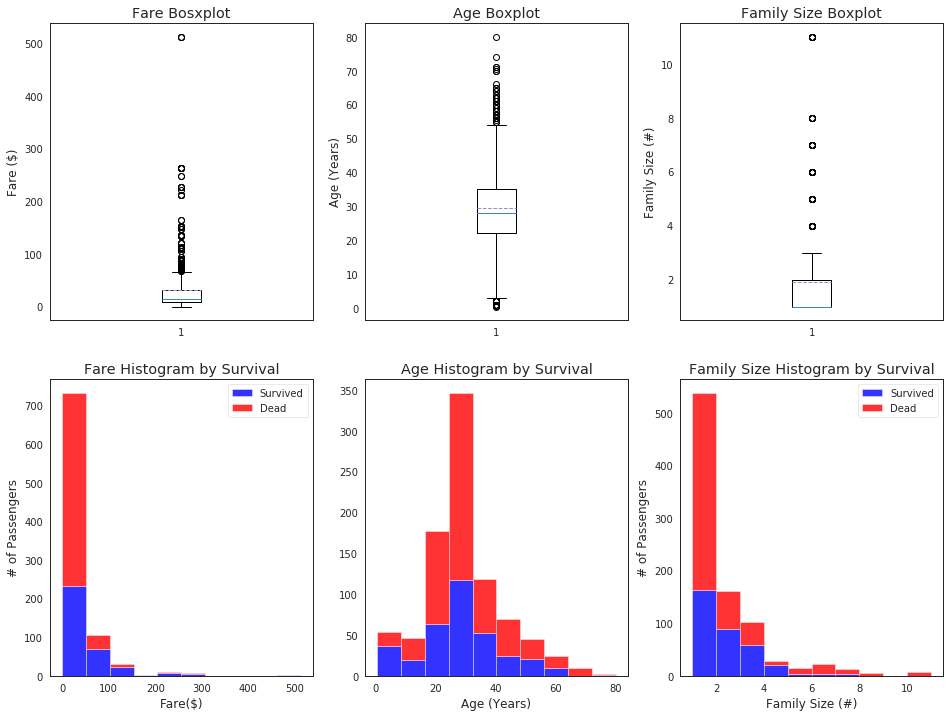

In [40]:
# DISTRIBUIÇÃO GRÁFICA DE DADOS QUANTITATIVOS
plt.figure(figsize=[16,12]) # configurando o tamanho do plot

# Gráfico de caixa da Tarifa
plt.subplot(231)
plt.boxplot(x=data1['Fare'], showmeans=True, meanline=True)
plt.title('Fare Bosxplot')
plt.ylabel('Fare ($)')

# Gráfico de caixa da Idade
plt.subplot(232)
plt.boxplot(data1['Age'], showmeans=True, meanline=True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

# Gráfico de caixa do Tamanho da Família
plt.subplot(233)
plt.boxplot(data1['FamilySize'], showmeans=True, meanline=True)
plt.title('Family Size Boxplot')
plt.ylabel('Family Size (#)')

# Histograma da Tarifa
plt.subplot(234)
plt.hist(x=[data1[data1['Survived'] == 1]['Fare'],data1[data1['Survived'] == 0]['Fare']],
         stacked=True, color=['blue', 'red'], alpha=0.8, label=['Survived', 'Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare($)')
plt.ylabel('# of Passengers')
plt.legend()

# Histograma da Idade
plt.subplot(235)
plt.hist(x=[data1[data1['Survived'] == 1]['Age'], data1[data1['Survived'] == 0]['Age']],
            stacked=True, color=['blue', 'red'], alpha=0.8, label=['Survived', 'Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')

# Histograma do Tamanho da Família
plt.subplot(236)
plt.hist(x=[data1[data1['Survived'] == 1]['FamilySize'], data1[data1['Survived'] == 0]['FamilySize']],
         stacked=True, color=['blue', 'red'], alpha=0.8, label=['Survived', 'Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size (#)')
plt.ylabel('# of Passengers')
plt.legend()

#**seaborn.barplot**
---
Um gráfico de barras representa uma estimativa da tendência central para uma variável numérica com a altura de cada retângulo e fornece alguma indicação da incerteza em torno dessa estimativa usando barras de erro. Os gráficos de barra incluem 0 no intervalo quantitativo do eixo e são uma boa opção quando 0 é um valor significativo para a variável quantitativa e você deseja fazer comparações com ela.

Para conjuntos de dados em que 0 não é um valor significativo, um gráfico de pontos permitirá que você se concentre nas diferenças entre os níveis de uma ou mais variáveis ​​categóricas.

Também é importante ter em mente que um gráfico de barras mostra apenas o valor médio (ou outro estimador), mas em muitos casos pode ser mais informativo mostrar a distribuição dos valores em cada nível das variáveis ​​categóricas. Nesse caso, outras abordagens, como uma caixa ou trama de violino, podem ser mais apropriadas.

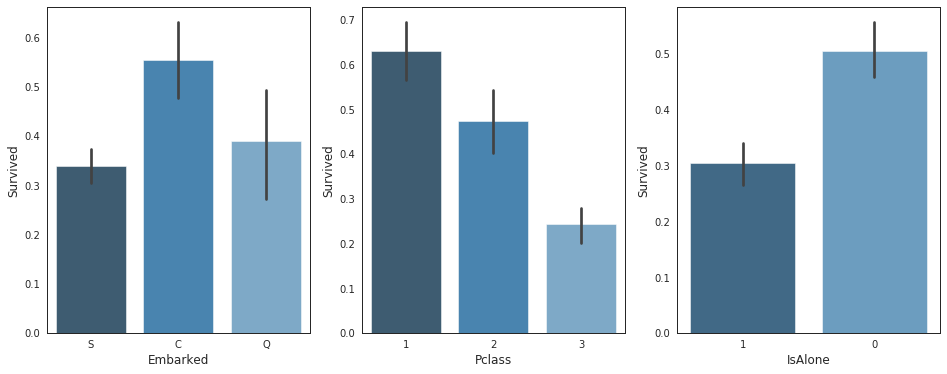

In [0]:
fig, saxis = plt.subplots(1, 3, figsize=(16,6))

sns.barplot(x='Embarked', y='Survived', data=data1, ax=saxis[0], palette='Blues_d')
sns.barplot(x='Pclass', y='Survived', order=[1,2,3], data=data1, ax=saxis[1], palette='Blues_d')
sns.barplot(x='IsAlone', y='Survived', order=[1,0], data=data1, ax=saxis[2], palette='Blues_d')

#**seaborn.pointplot**
---
Um gráfico de pontos representa uma estimativa da tendência central para uma variável numérica pela posição dos pontos do gráfico de dispersão e fornece alguma indicação da incerteza em torno dessa estimativa usando barras de erro.

Os gráficos de pontos podem ser mais úteis do que os gráficos de barras para focar comparações entre diferentes níveis de uma ou mais variáveis ​​categóricas. Eles são particularmente hábeis em mostrar interações: como a relação entre os níveis de uma variável categórica muda nos níveis de uma segunda variável categórica. As linhas que unem cada ponto do mesmo hue nível permitem que as interações sejam julgadas pelas diferenças de inclinação, o que é mais fácil para os olhos do que comparar as alturas de vários grupos de pontos ou barras.

É importante ter em mente que um gráfico de pontos mostra apenas o valor médio (ou outro estimador), mas em muitos casos pode ser mais informativo mostrar a distribuição dos valores em cada nível das variáveis ​​categóricas. Nesse caso, outras abordagens, como uma caixa ou um gráfico de violino, podem ser mais apropriadas.

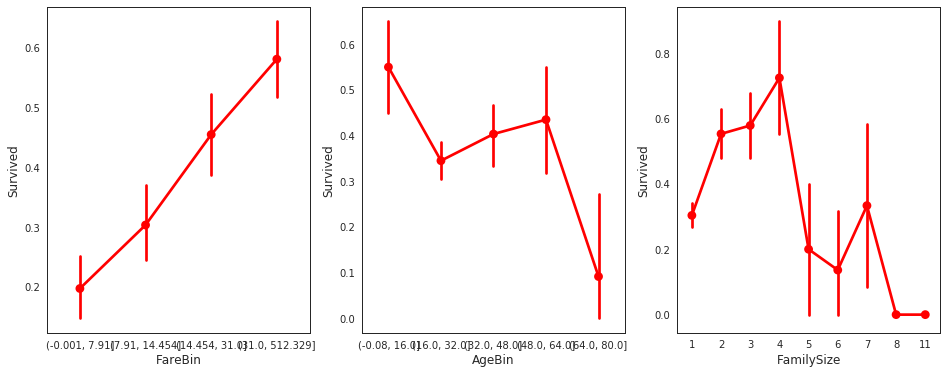

In [41]:
fig, saxis = plt.subplots(1, 3, figsize=(16,6))

sns.pointplot(x='FareBin', y='Survived', data=data1, ax=saxis[0], color='red')
sns.pointplot(x='AgeBin', y='Survived', data=data1, ax=saxis[1], color='red')
sns.pointplot(x='FamilySize', y='Survived', data=data1, ax=saxis[2], color='red')